# Rosenbrock toy distribution

This function (further described [here](http://pints.readthedocs.io/en/latest/toy/rosenbrock.html)) which when inverted has the form

$ p(x, y) \propto  \frac{1}{\left( (a - x)^2 + b (y - x^2)^2) \right)}, $

where by default $a = 1$ and $b = 100$.

We now plot this function.

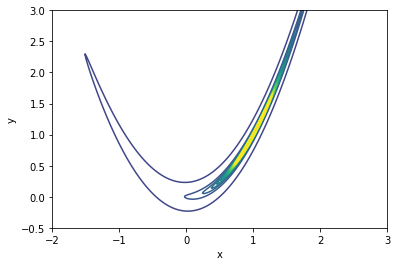

In [2]:
from __future__ import print_function
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create Rosenbrock log pdf
log_pdf = pints.toy.RosenbrockLogPDF()

# Contour plot of pdf
levels = np.linspace(-3, 12, 20)
x = np.linspace(-2, 3, 400)
y = np.linspace(-0.5, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, levels = levels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [3]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([-2, -0.5], [3, 3], size=(4, 2))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Stop after 8000 iterations
mcmc.set_max_iterations(6000)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[2000:] for chain in chains]

Running...
Done!


We inspect the results by creating a scatter plot of the samples:

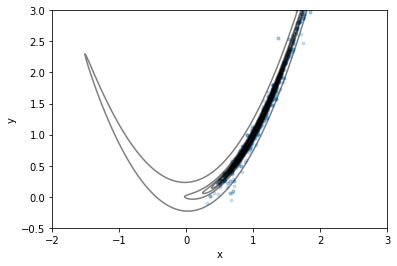

In [4]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-2, 3)
plt.ylim(-0.5, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()